In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

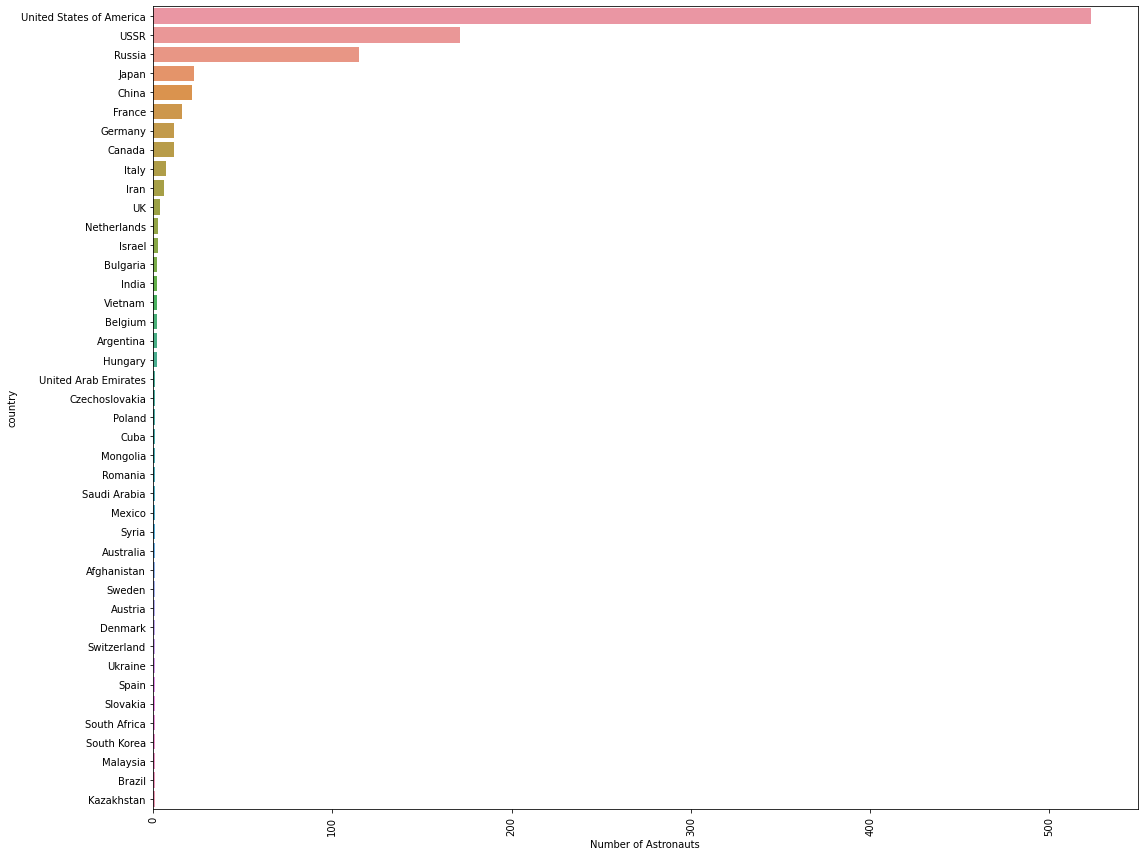

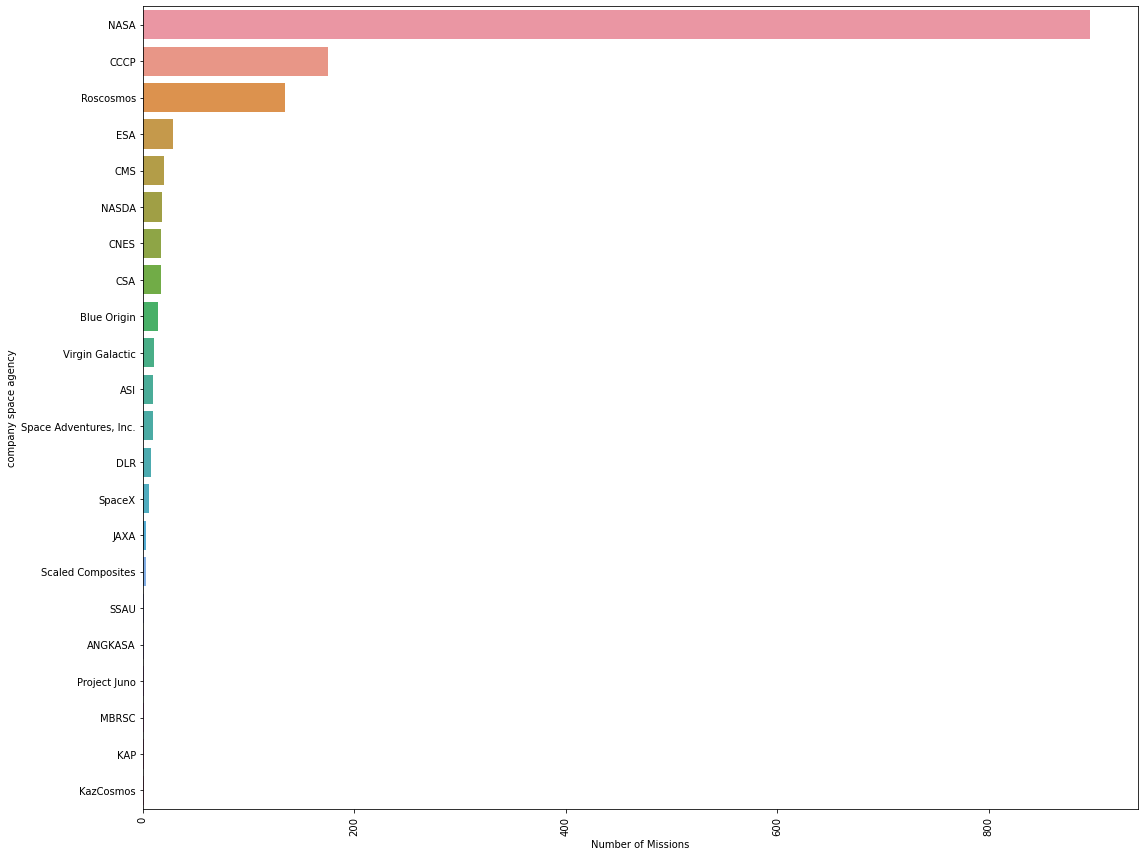

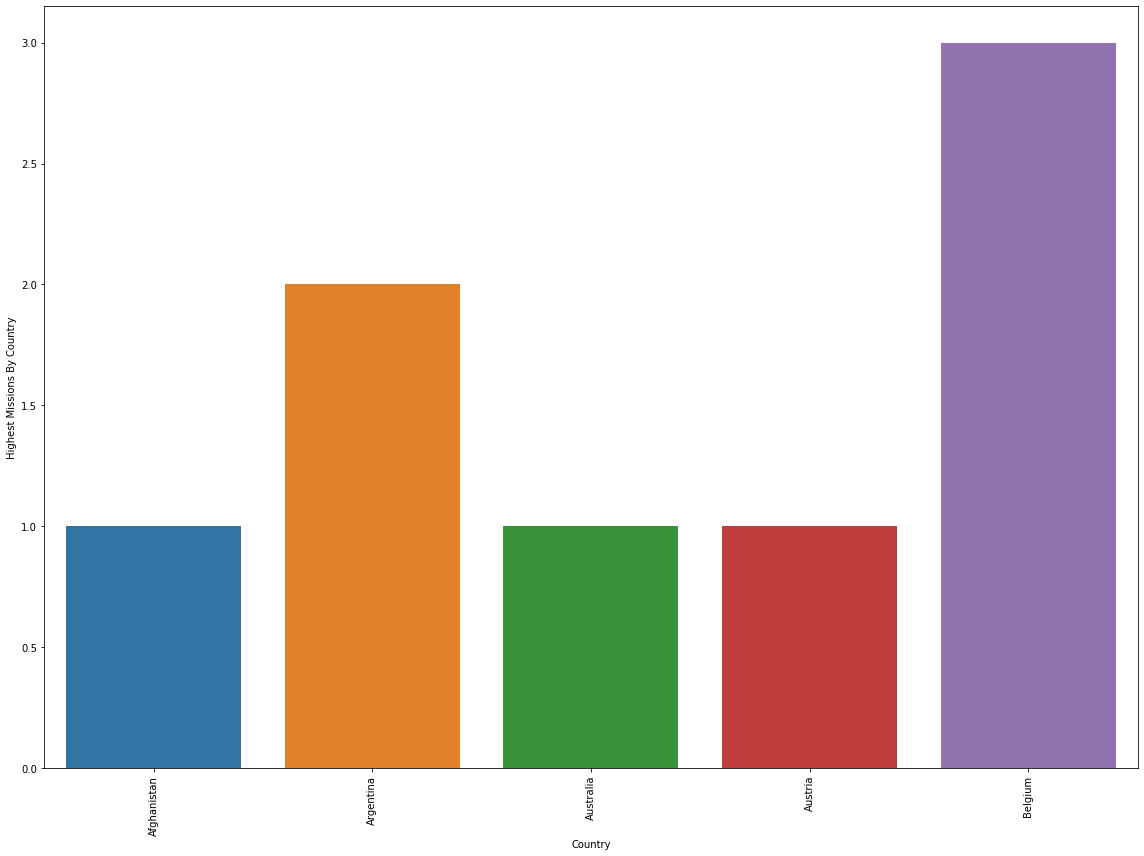

In [25]:
def Reading_data(asn_data_loc):
    asn_data = pd.read_csv(asn_data_loc)
    
    # Random 5 samples of data
    random_samples = asn_data.sample(5)
    random_samples.to_excel('Random_Samples.xlsx', index=False)
    
    conv_columns = ['days in space', 'spacewalks', 'days spacewalking', 'missions']
    asn_data_f = asn_data.copy()
    for col in conv_columns:
        asn_data_f[col] = pd.to_numeric(asn_data_f[col], errors='coerce')
    
    # Astronauts still in space
    Ast_in_space = asn_data_f[asn_data_f['still in space'] == 'yes']
    Ast_in_space.to_excel('Astronauts_In_Space.xlsx', index=False)
    
    # Country wise astronauts days in space
    asn_country = asn_data_f['country'].value_counts().reset_index()
    asn_country.columns = ['country', 'no_of_astronauts']
    asn_country.to_excel('Country_Wise_Astronauts.xlsx', index=False)
    
    # Highest number of missions by country
    grouped_data = asn_data_f.groupby('country').sum().reset_index()
    grouped_data.head().to_excel('Highest_Missions_By_Country.xlsx', index=False)
    
    # List of columns for numeric conversion
    conversion_columns = pd.DataFrame({'Columns': conv_columns})
    conversion_columns.to_excel('Numeric_Conversion_Columns.xlsx', index=False)
    
    # Plotting no of space agencies country wise
    country_agency = asn_data_f.groupby('country')['company space agency'].nunique().reset_index().sort_values(by='company space agency', ascending=False)
    country_agency.to_excel('Space_Agencies_Country_Wise.xlsx', index=False)
    
    # No of missions space agency wise
    agency_mission = asn_data_f.groupby('company space agency')['missions'].sum().reset_index().sort_values(by='missions', ascending=False)
    agency_mission.to_excel('Missions_Space_Agency_Wise.xlsx', index=False)
    
    # Create plots and save them as separate image files
    for sheet_name in ['Country_Wise_Astronauts', 'Missions_Space_Agency_Wise', 'Highest_Missions_By_Country']:
        fig, ax = plt.subplots(figsize=(16, 12))
        if sheet_name == 'Country_Wise_Astronauts':
            sns.barplot(data=asn_country, x='no_of_astronauts', y='country', ax=ax)
            ax.set_xlabel('Number of Astronauts')
        elif sheet_name == 'Missions_Space_Agency_Wise':
            sns.barplot(data=agency_mission, y='company space agency', x='missions', ax=ax)
            ax.set_xlabel('Number of Missions')
        else:
            sns.barplot(data=grouped_data.head(), x='country', y='missions', ax=ax)
            ax.set_xlabel('Country')
            ax.set_ylabel(sheet_name.replace('_', ' '))
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Plot_{sheet_name}.png')
    
    return grouped_data

asn_data_loc = 'astronauts(Human and Non Humans).csv'
test = Reading_data(asn_data_loc)
